### [ TALLER 04 ] : SPLINES CÚBICOS

Nombre: Alegria Isabel Farinango Farinango 

Fecha: 24/11/2025

$$ 1.  {(0,-12), (1,2), (2,-4)} 

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos dados
x = np.array([0, 1, 2])
y = np.array([-12, 2, -4])

# Coeficientes 
a0 = -12
a1 = 2
b0 = 16
b1 = 10
c0 = 0
c1 = -6
d0 = -2
d1 = 2

# Funciones spline
def S0(t): return a0 + b0*t + c0*t**2 + d0*t**3
def S1(t): return a1 + b1*(t-1) + c1*(t-1)**2 + d1*(t-1)**3

# Generar puntos para graficar
t0 = np.linspace(0, 1, 100)
t1 = np.linspace(1, 2, 100)

y0 = S0(t0)
y1 = S1(t1)

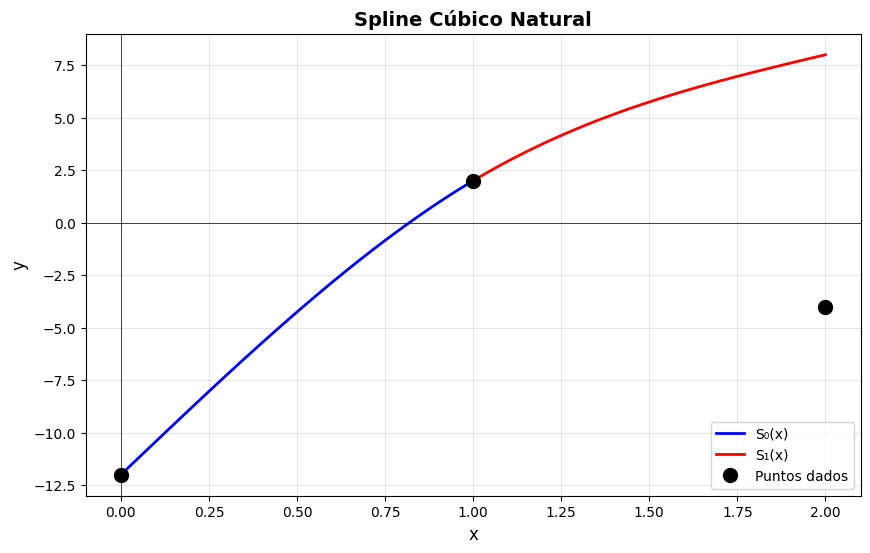

Coeficientes:
S₀(x) = -12 + 16x + 0x² + -2x³
S₁(x) = 2 + 10(x-1) + -6(x-1)² + 2(x-1)³


In [42]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t0, y0, 'b-', linewidth=2, label='S₀(x)')
plt.plot(t1, y1, 'r-', linewidth=2, label='S₁(x)')
plt.plot(x, y, 'ko', markersize=10, label='Puntos dados')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Spline Cúbico Natural', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

print("Coeficientes:")
print(f"S₀(x) = {a0} + {b0}x + {c0}x² + {d0}x³")
print(f"S₁(x) = {a1} + {b1}(x-1) + {c1}(x-1)² + {d1}(x-1)³")

---

2. Complete el código del siguiente repositorio : https://github.com/ztjona/splines

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def cubic_spline_natural(x, y):
    """
    Calcula spline cúbico con frontera natural
    S''(x0) = 0, S''(xn) = 0
    """
    n = len(x) - 1
    h = np.diff(x)
    
    # Construir sistema de ecuaciones para c
    A = np.zeros((n+1, n+1))
    b_vec = np.zeros(n+1)
    
    # Frontera natural: c[0] = 0
    A[0, 0] = 1
    
    # Ecuaciones internas
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2*(h[i-1] + h[i])
        A[i, i+1] = h[i]
        b_vec[i] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    
    # Frontera natural: c[n] = 0
    A[n, n] = 1
    
    # Resolver para c
    c = np.linalg.solve(A, b_vec)
    
    # Calcular a, b, d
    a = y[:-1]
    b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        b[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*c[i] + c[i+1])/3
        d[i] = (c[i+1] - c[i])/(3*h[i])
    
    return a, b, c[:-1], d

In [44]:
def cubic_spline_clamped(x, y, B0, Bn):
    """
    Calcula spline cúbico con frontera condicionada
    S'(x0) = B0, S'(xn) = Bn
    """
    n = len(x) - 1
    h = np.diff(x)
    
    # Construir sistema de ecuaciones para c
    A = np.zeros((n+1, n+1))
    b_vec = np.zeros(n+1)
    
    # Condición inicial: S'(x0) = B0
    A[0, 0] = 2*h[0]
    A[0, 1] = h[0]
    b_vec[0] = 3*((y[1]-y[0])/h[0] - B0)
    
    # Ecuaciones internas
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2*(h[i-1] + h[i])
        A[i, i+1] = h[i]
        b_vec[i] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    
    # Condición final: S'(xn) = Bn
    A[n, n-1] = h[n-1]
    A[n, n] = 2*h[n-1]
    b_vec[n] = 3*(Bn - (y[n]-y[n-1])/h[n-1])
    
    # Resolver para c
    c = np.linalg.solve(A, b_vec)
    
    # Calcular a, b, d
    a = y[:-1]
    b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        b[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*c[i] + c[i+1])/3
        d[i] = (c[i+1] - c[i])/(3*h[i])
    
    return a, b, c[:-1], d


In [45]:
def evaluate_spline(x_data, coeffs, x_eval):
    """Evalúa el spline en puntos x_eval"""
    a, b, c, d = coeffs
    n = len(a)
    y_eval = np.zeros_like(x_eval)
    
    for i, x in enumerate(x_eval):
        # Encontrar el segmento correcto
        j = np.searchsorted(x_data[1:], x)
        j = min(j, n-1)
        
        dx = x - x_data[j]
        y_eval[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    
    return y_eval

def plot_spline(x_data, y_data, coeffs_natural, coeffs_clamped, B1, title=""):
    """Grafica splines natural y condicionado"""
    x_plot = np.linspace(x_data[0], x_data[-1], 200)
    y_natural = evaluate_spline(x_data, coeffs_natural, x_plot)
    y_clamped = evaluate_spline(x_data, coeffs_clamped, x_plot)
    
    plt.figure(figsize=(12, 5))
    
    # Spline natural
    plt.subplot(1, 2, 1)
    plt.plot(x_plot, y_natural, 'b-', linewidth=2, label='Spline natural')
    plt.plot(x_data, y_data, 'ro', markersize=8, label='Puntos')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Spline Cúbico Natural\n{title}')
    plt.legend()
    
    # Spline condicionado
    plt.subplot(1, 2, 2)
    plt.plot(x_plot, y_clamped, 'g-', linewidth=2, label=f'Spline condicionado (B₁={B1})')
    plt.plot(x_data, y_data, 'ro', markersize=8, label='Puntos')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Spline Cúbico Condicionado (B₀=1, B₁={B1})\n{title}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def print_spline_equations(x_data, coeffs, type_name="Natural"):
    """Imprime las ecuaciones del spline"""
    a, b, c, d = coeffs
    n = len(a)
    
    print(f"\n{'-'*60}")
    print(f"SPLINE CÚBICO - {type_name}")
    print(f"{'-'*60}")
    
    for i in range(n):
        print(f"\nS_{i}(x) en [{x_data[i]}, {x_data[i+1]}]:")
        print(f"  S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}(x-{x_data[i]}) + {c[i]:.4f}(x-{x_data[i]})² + {d[i]:.4f}(x-{x_data[i]})³")
        
        # Forma expandida
        if x_data[i] == 0:
            print(f"  S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}x + {c[i]:.4f}x² + {d[i]:.4f}x³")

---

3. Compruebe gráficamente la solución de los siguientes ejercicios

$$ (0,1),(1,5),(2,3)


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA NATURAL
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 5.5000(x-0) + 0.0000(x-0)² + -1.5000(x-0)³
  S_0(x) = 1.0000 + 5.5000x + 0.0000x² + -1.5000x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + 1.0000(x-1) + -4.5000(x-1)² + 1.5000(x-1)³

------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=-2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 1.0000(x-0) + 8.2500(x-0)² + -5.2500(x-0)³
  S_0(x) = 1.0000 + 1.0000x + 8.2500x² + -5.2500x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + 1.7500(x-1) + -7.5000(x-1)² + 3.7500(x-1)³


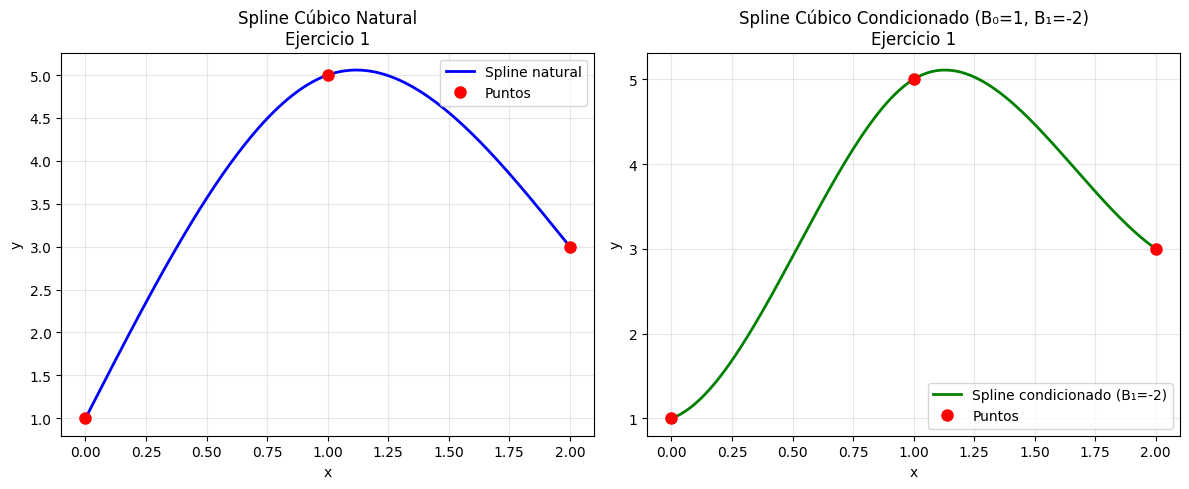


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=0)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 1.0000(x-0) + 8.7500(x-0)² + -5.7500(x-0)³
  S_0(x) = 1.0000 + 1.0000x + 8.7500x² + -5.7500x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + 1.2500(x-1) + -8.5000(x-1)² + 5.2500(x-1)³


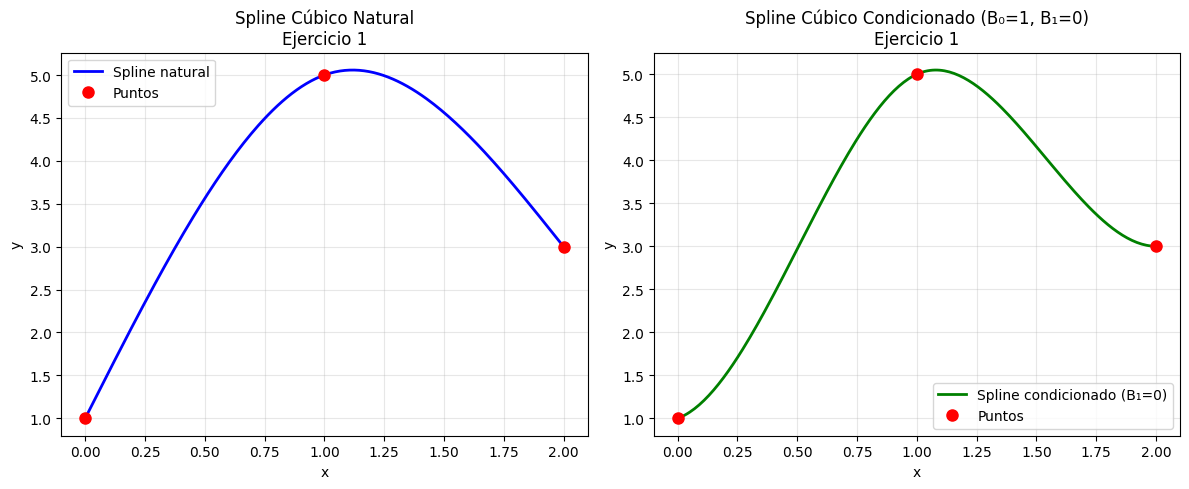


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 1.0000(x-0) + 9.2500(x-0)² + -6.2500(x-0)³
  S_0(x) = 1.0000 + 1.0000x + 9.2500x² + -6.2500x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + 0.7500(x-1) + -9.5000(x-1)² + 6.7500(x-1)³


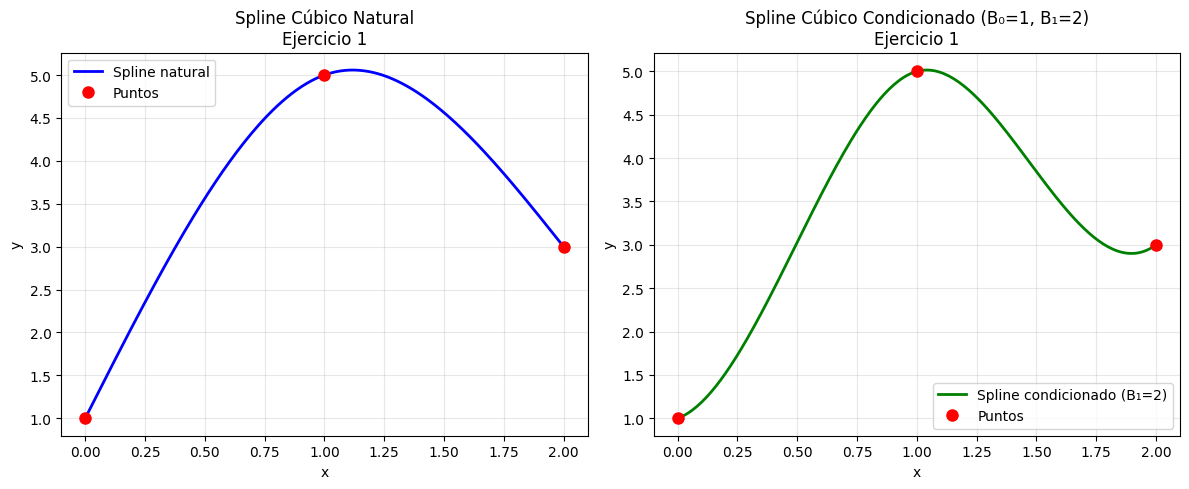


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=4)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 1.0000(x-0) + 9.7500(x-0)² + -6.7500(x-0)³
  S_0(x) = 1.0000 + 1.0000x + 9.7500x² + -6.7500x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + 0.2500(x-1) + -10.5000(x-1)² + 8.2500(x-1)³


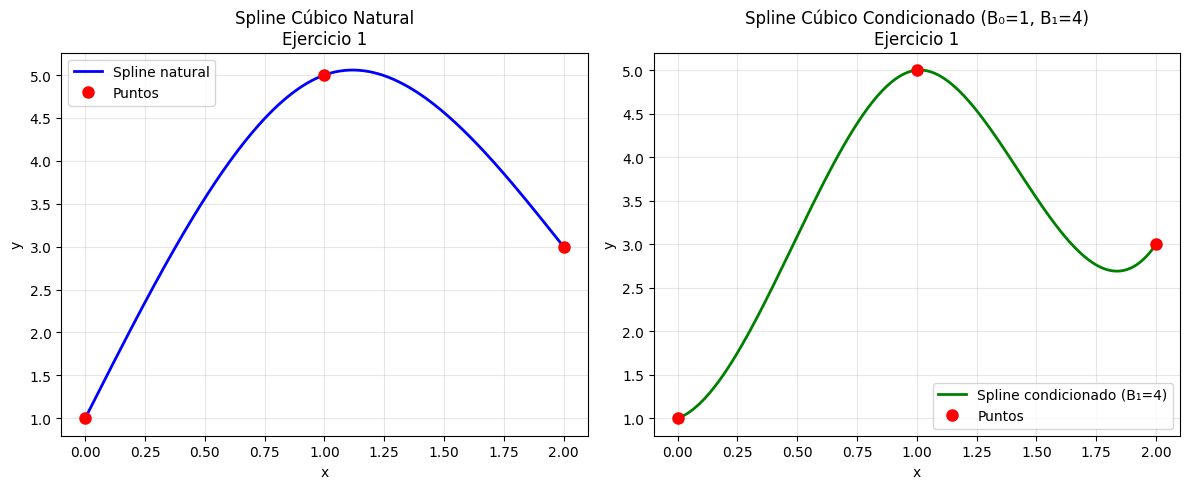


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=6)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = 1.0000 + 1.0000(x-0) + 10.2500(x-0)² + -7.2500(x-0)³
  S_0(x) = 1.0000 + 1.0000x + 10.2500x² + -7.2500x³

S_1(x) en [1, 2]:
  S_1(x) = 5.0000 + -0.2500(x-1) + -11.5000(x-1)² + 9.7500(x-1)³


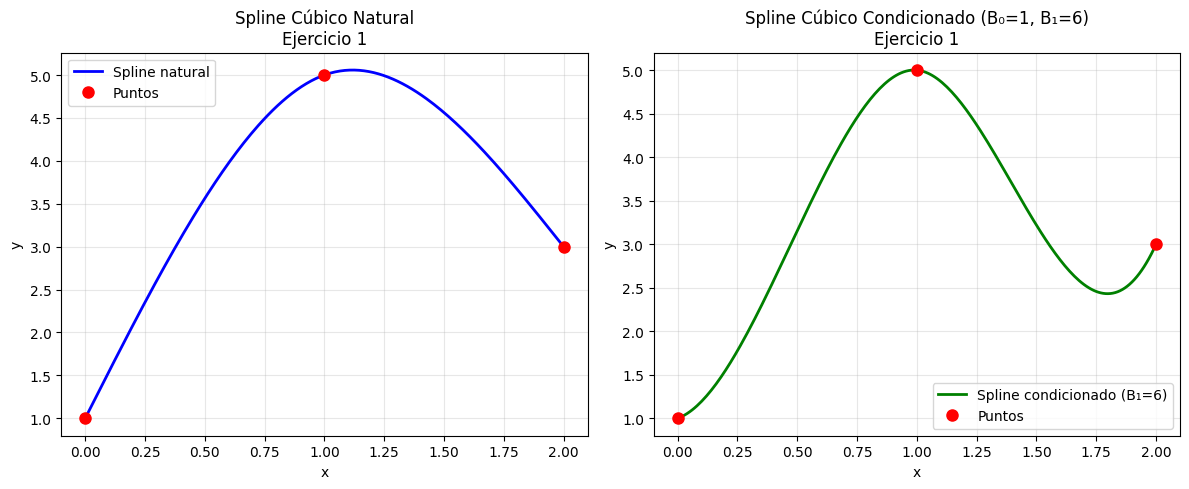

In [46]:
x1 = np.array([0, 1, 2])
y1 = np.array([1, 5, 3])

# Natural
a1_nat, b1_nat, c1_nat, d1_nat = cubic_spline_natural(x1, y1)
coeffs1_nat = (a1_nat, b1_nat, c1_nat, d1_nat)
print_spline_equations(x1, coeffs1_nat, "FRONTERA NATURAL")

# Condicionado con diferentes B1
B0 = 1
B1_values = [-2, 0, 2, 4, 6]

for B1 in B1_values:
    a1_clamp, b1_clamp, c1_clamp, d1_clamp = cubic_spline_clamped(x1, y1, B0, B1)
    coeffs1_clamp = (a1_clamp, b1_clamp, c1_clamp, d1_clamp)
    print_spline_equations(x1, coeffs1_clamp, f"FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})")
    plot_spline(x1, y1, coeffs1_nat, coeffs1_clamp, B1, f"Ejercicio 1")


---

$$ (0,−5),(1,−4),(2,3) 


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA NATURAL
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + -0.5000(x-0) + 0.0000(x-0)² + 1.5000(x-0)³
  S_0(x) = -5.0000 + -0.5000x + 0.0000x² + 1.5000x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 4.0000(x-1) + 4.5000(x-1)² + -1.5000(x-1)³

------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=-2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + 1.0000(x-0) + -5.2500(x-0)² + 5.2500(x-0)³
  S_0(x) = -5.0000 + 1.0000x + -5.2500x² + 5.2500x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 6.2500(x-1) + 10.5000(x-1)² + -9.7500(x-1)³


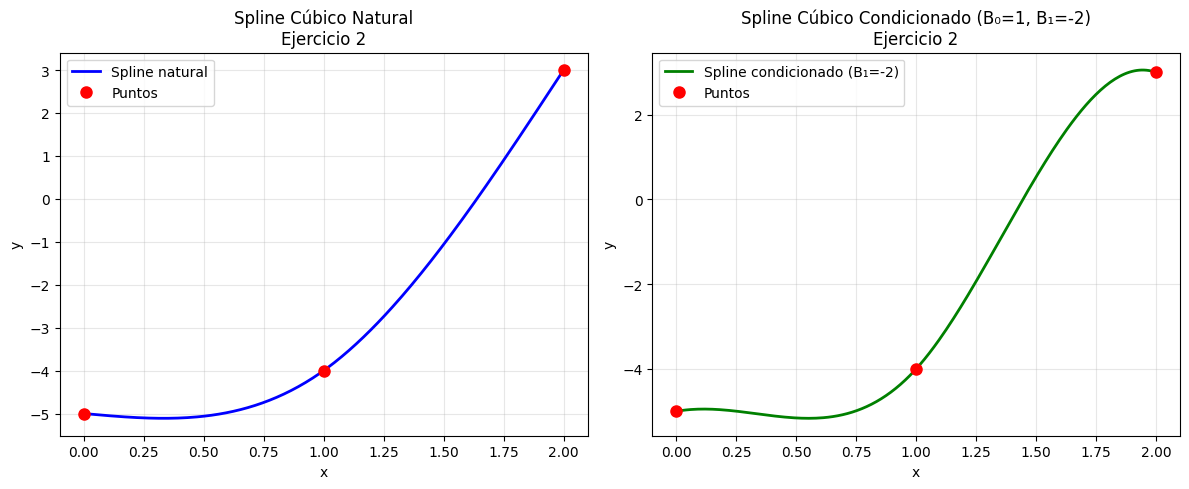


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=0)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + 1.0000(x-0) + -4.7500(x-0)² + 4.7500(x-0)³
  S_0(x) = -5.0000 + 1.0000x + -4.7500x² + 4.7500x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 5.7500(x-1) + 9.5000(x-1)² + -8.2500(x-1)³


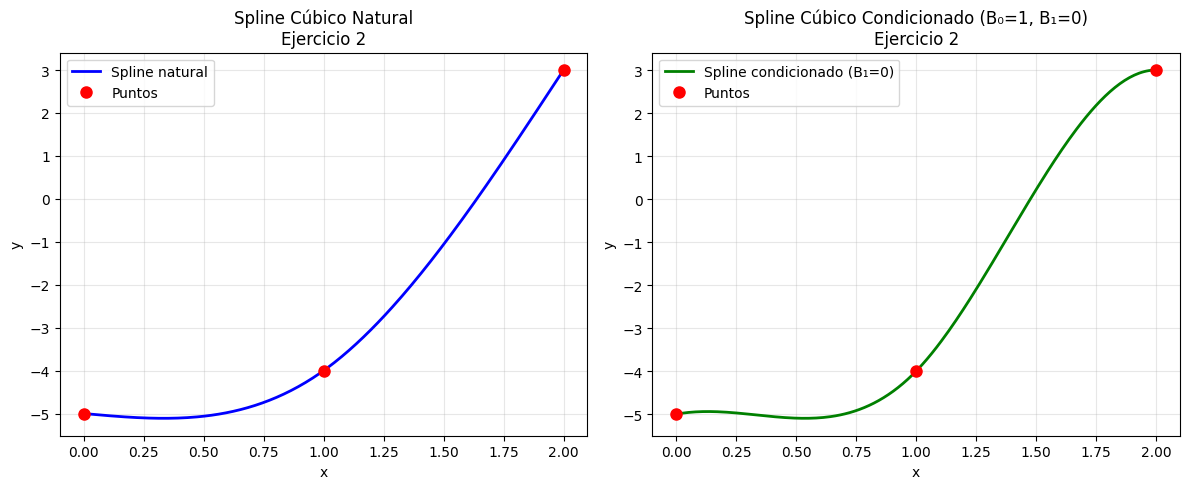


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + 1.0000(x-0) + -4.2500(x-0)² + 4.2500(x-0)³
  S_0(x) = -5.0000 + 1.0000x + -4.2500x² + 4.2500x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 5.2500(x-1) + 8.5000(x-1)² + -6.7500(x-1)³


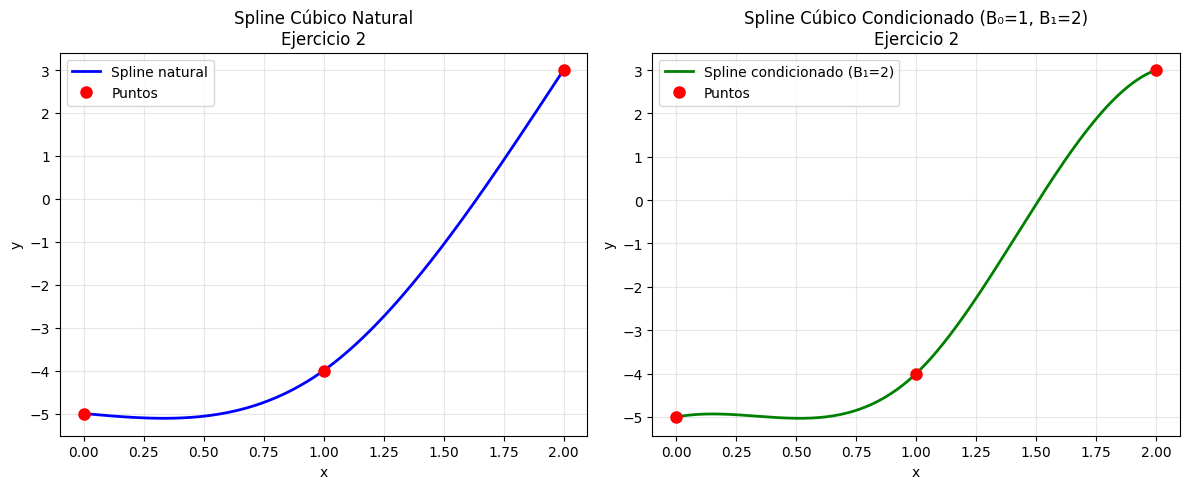


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=4)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + 1.0000(x-0) + -3.7500(x-0)² + 3.7500(x-0)³
  S_0(x) = -5.0000 + 1.0000x + -3.7500x² + 3.7500x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 4.7500(x-1) + 7.5000(x-1)² + -5.2500(x-1)³


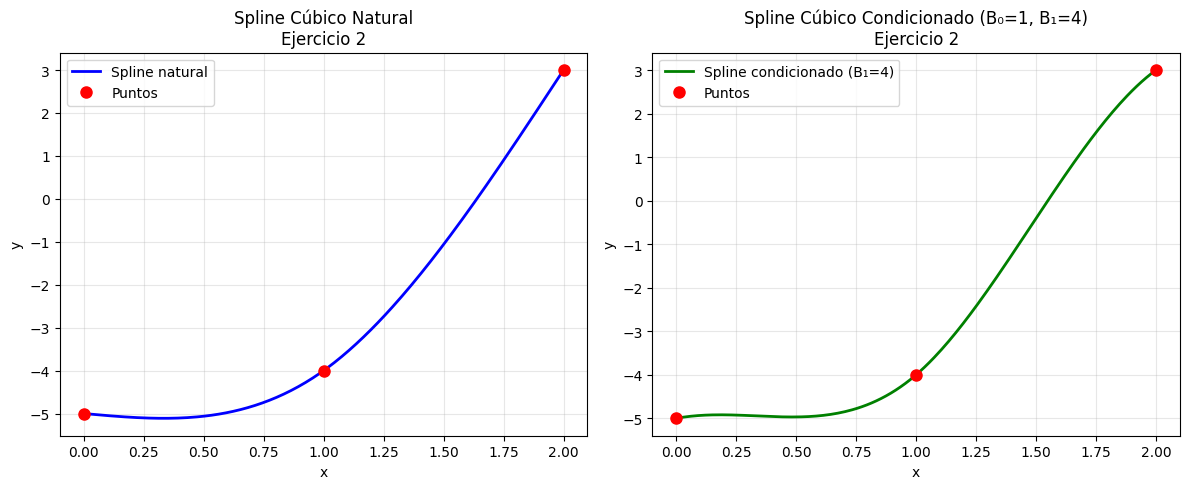


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=6)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -5.0000 + 1.0000(x-0) + -3.2500(x-0)² + 3.2500(x-0)³
  S_0(x) = -5.0000 + 1.0000x + -3.2500x² + 3.2500x³

S_1(x) en [1, 2]:
  S_1(x) = -4.0000 + 4.2500(x-1) + 6.5000(x-1)² + -3.7500(x-1)³


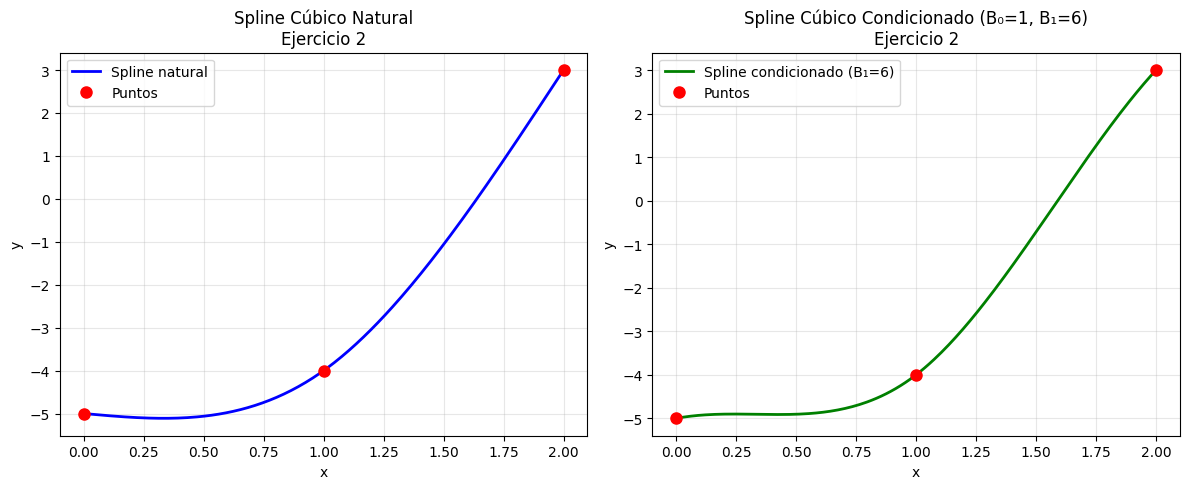

In [47]:
x2 = np.array([0, 1, 2])
y2 = np.array([-5, -4, 3])

# Natural
a2_nat, b2_nat, c2_nat, d2_nat = cubic_spline_natural(x2, y2)
coeffs2_nat = (a2_nat, b2_nat, c2_nat, d2_nat)
print_spline_equations(x2, coeffs2_nat, "FRONTERA NATURAL")

# Condicionado
for B1 in B1_values:
    a2_clamp, b2_clamp, c2_clamp, d2_clamp = cubic_spline_clamped(x2, y2, B0, B1)
    coeffs2_clamp = (a2_clamp, b2_clamp, c2_clamp, d2_clamp)
    print_spline_equations(x2, coeffs2_clamp, f"FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})")
    plot_spline(x2, y2, coeffs2_nat, coeffs2_clamp, B1, f"Ejercicio 2")

---

$$ (0,−1),(1,1),(2,5),(3,2)


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA NATURAL
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + 0.0000(x-0)² + 1.0000(x-0)³
  S_0(x) = -1.0000 + 1.0000x + 0.0000x² + 1.0000x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.0000(x-1) + 3.0000(x-1)² + -3.0000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + 1.0000(x-2) + -6.0000(x-2)² + 2.0000(x-2)³

------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=-2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + -0.2000(x-0)² + 1.2000(x-0)³
  S_0(x) = -1.0000 + 1.0000x + -0.2000x² + 1.2000x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.2000(x-1) + 3.4000(x-1)² + -3.6000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + 0.2000(x-2) + -7.4000(x-2)² + 4.2000(x-2)³


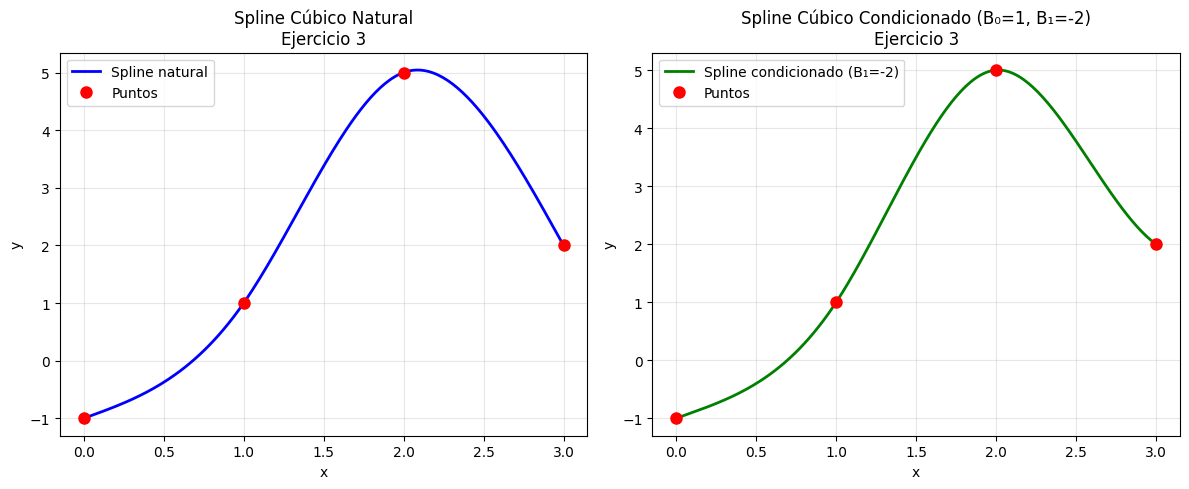


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=0)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + -0.3333(x-0)² + 1.3333(x-0)³
  S_0(x) = -1.0000 + 1.0000x + -0.3333x² + 1.3333x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.3333(x-1) + 3.6667(x-1)² + -4.0000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + -0.3333(x-2) + -8.3333(x-2)² + 5.6667(x-2)³


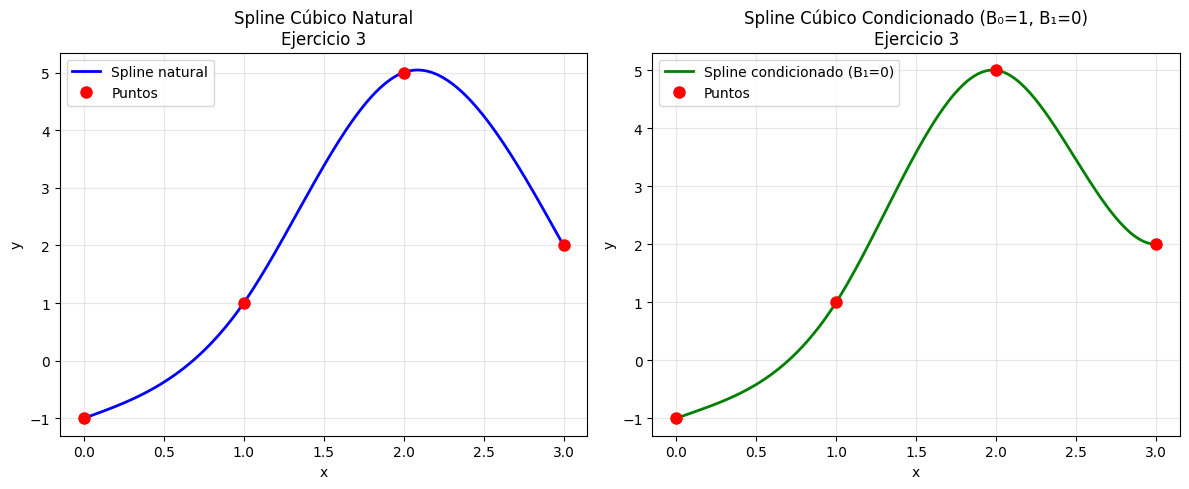


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=2)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + -0.4667(x-0)² + 1.4667(x-0)³
  S_0(x) = -1.0000 + 1.0000x + -0.4667x² + 1.4667x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.4667(x-1) + 3.9333(x-1)² + -4.4000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + -0.8667(x-2) + -9.2667(x-2)² + 7.1333(x-2)³


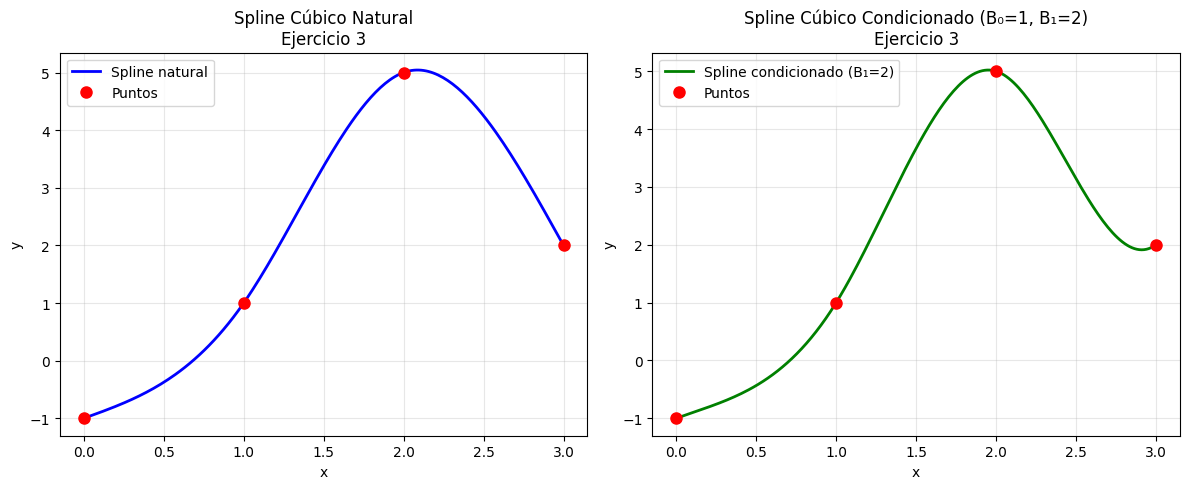


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=4)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + -0.6000(x-0)² + 1.6000(x-0)³
  S_0(x) = -1.0000 + 1.0000x + -0.6000x² + 1.6000x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.6000(x-1) + 4.2000(x-1)² + -4.8000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + -1.4000(x-2) + -10.2000(x-2)² + 8.6000(x-2)³


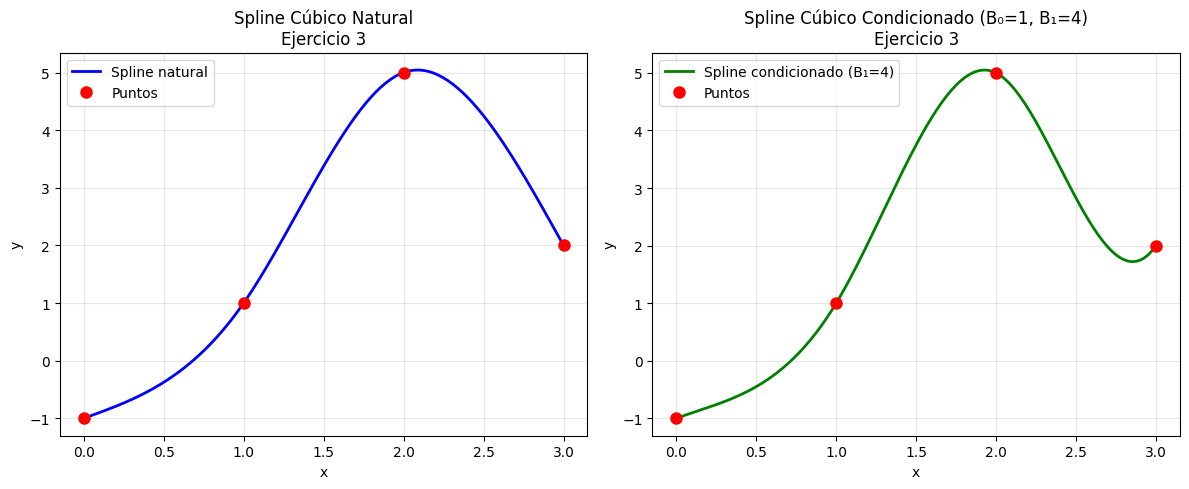


------------------------------------------------------------
SPLINE CÚBICO - FRONTERA CONDICIONADA (B₀=1, B₁=6)
------------------------------------------------------------

S_0(x) en [0, 1]:
  S_0(x) = -1.0000 + 1.0000(x-0) + -0.7333(x-0)² + 1.7333(x-0)³
  S_0(x) = -1.0000 + 1.0000x + -0.7333x² + 1.7333x³

S_1(x) en [1, 2]:
  S_1(x) = 1.0000 + 4.7333(x-1) + 4.4667(x-1)² + -5.2000(x-1)³

S_2(x) en [2, 3]:
  S_2(x) = 5.0000 + -1.9333(x-2) + -11.1333(x-2)² + 10.0667(x-2)³


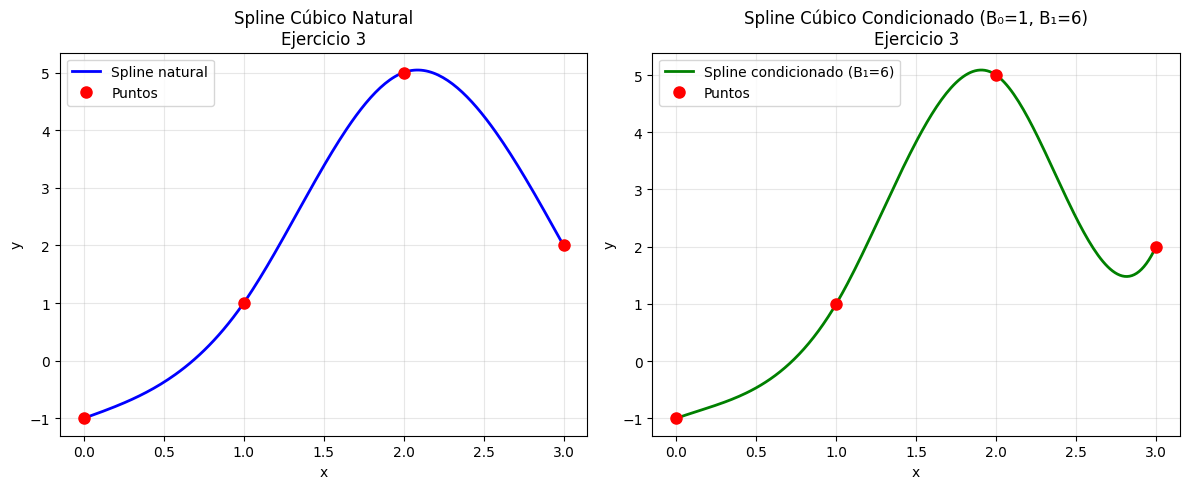

In [48]:
x3 = np.array([0, 1, 2, 3])
y3 = np.array([-1, 1, 5, 2])

# Natural
a3_nat, b3_nat, c3_nat, d3_nat = cubic_spline_natural(x3, y3)
coeffs3_nat = (a3_nat, b3_nat, c3_nat, d3_nat)
print_spline_equations(x3, coeffs3_nat, "FRONTERA NATURAL")

# Condicionado
for B1 in B1_values:
    a3_clamp, b3_clamp, c3_clamp, d3_clamp = cubic_spline_clamped(x3, y3, B0, B1)
    coeffs3_clamp = (a3_clamp, b3_clamp, c3_clamp, d3_clamp)
    print_spline_equations(x3, coeffs3_clamp, f"FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})")
    plot_spline(x3, y3, coeffs3_nat, coeffs3_clamp, B1, f"Ejercicio 3")

---

4. Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $$B0=1$$ para todos los valores de $$B1∈R$$

In [49]:
def create_animation(x_data, y_data, exercise_num):
    """Crea animación variando B1 de -5 a 5"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Calcular spline natural
    coeffs_nat = cubic_spline_natural(x_data, y_data)
    x_plot = np.linspace(x_data[0], x_data[-1], 200)
    y_nat = evaluate_spline(x_data, coeffs_nat, x_plot)
    
    # Configurar gráficas
    ax1.plot(x_plot, y_nat, 'b-', linewidth=2, label='Natural')
    ax1.plot(x_data, y_data, 'ro', markersize=8)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Spline Natural (fijo)')
    ax1.legend()
    
    line, = ax2.plot([], [], 'g-', linewidth=2)
    points, = ax2.plot(x_data, y_data, 'ro', markersize=8)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_xlim(x_data[0], x_data[-1])
    ax2.set_ylim(min(y_data)-2, max(y_data)+2)
    title_text = ax2.set_title('')
    
    def init():
        line.set_data([], [])
        return line, title_text
    
    def animate(frame):
        B1 = -5 + frame * 0.2  # De -5 a 5
        coeffs_clamp = cubic_spline_clamped(x_data, y_data, 1, B1)
        y_clamp = evaluate_spline(x_data, coeffs_clamp, x_plot)
        line.set_data(x_plot, y_clamp)
        title_text.set_text(f'Spline Condicionado (B₀=1, B₁={B1:.1f})')
        return line, title_text
    
    anim = FuncAnimation(fig, animate, init_func=init, frames=50, 
                        interval=100, blit=True, repeat=True)
    
    plt.suptitle(f'Ejercicio {exercise_num}: Animación B₁ ∈ [-5, 5]')
    plt.tight_layout()
    return anim


----

5. Realice una animación de la variación de los splines cúbicos al variar $$B1$$

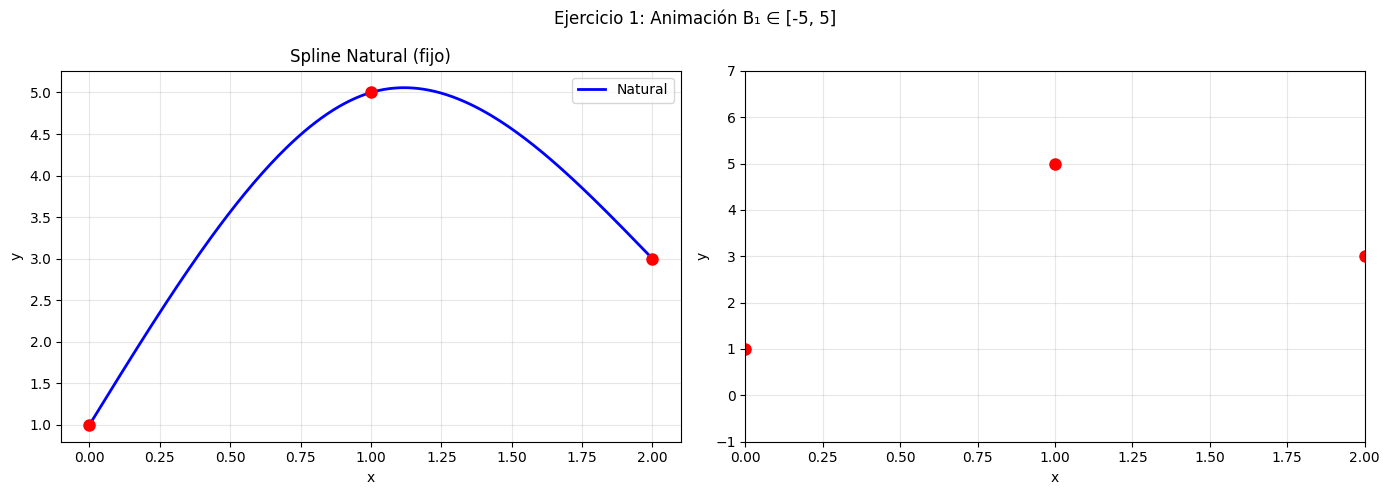

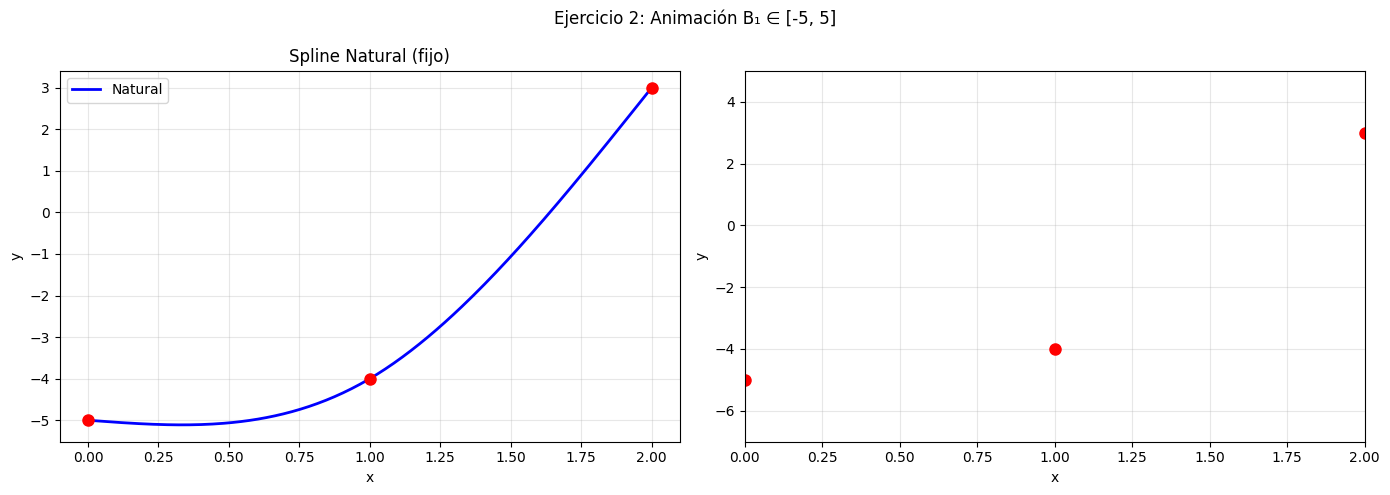

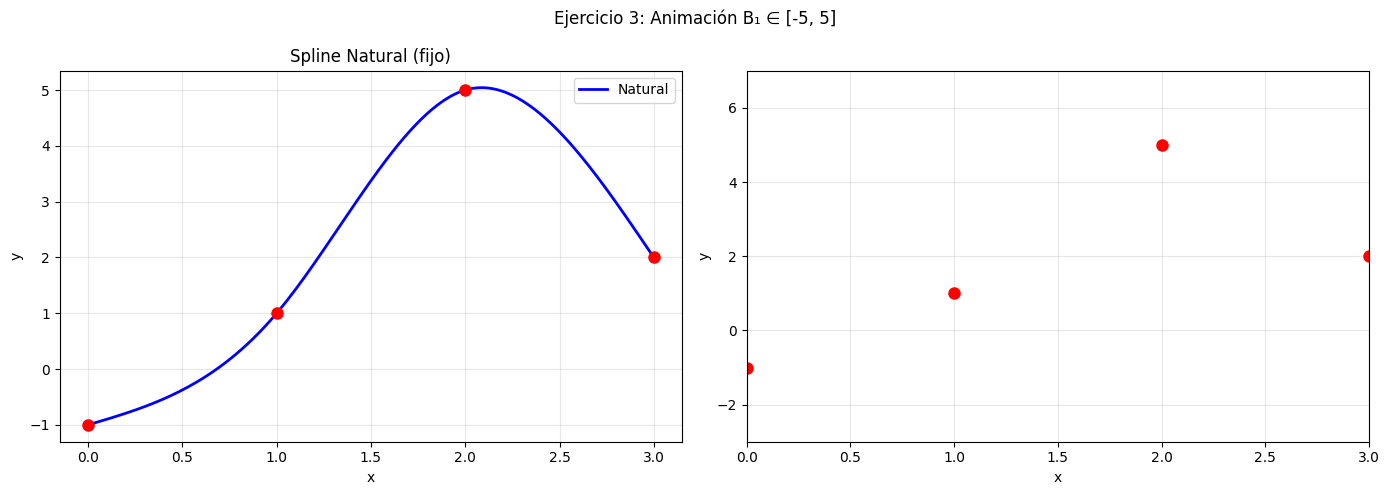

In [50]:
anim1 = create_animation(x1, y1, 1)
anim2 = create_animation(x2, y2, 2)
anim3 = create_animation(x3, y3, 3)

plt.show()